<a href="https://colab.research.google.com/github/Vanessavill/Vanessavill.github.io/blob/PROYECTOS-MACHINE-LEARNING/Proyecto_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
df = pd.read_csv('/content/economicas.csv')
df


,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df.isnull()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3851,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:
df.describe()

,RESULT_CODIGOPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,INST_COD_INSTITUCION,ESTU_SNIES_PRGMACADEMICO,...,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
count,3855.0,3855.000000,3855.000000,3855.0,3855.000000,3855.000000,2.768000e+03,2768.000000,3855.000000,3855.000000,...,3855.000000,3801.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3724.000000,3724.000000,3855.000000
mean,2001.0,123.739818,1.622049,20212.0,55.073152,29283.845396,2.364019e+11,32569.526012,1893.681453,29043.246174,...,149.962387,2.552749,59.087938,49.790921,159.772763,50.912581,66.143191,52.392272,2.339689,2.204929
std,0.0,36.175271,0.823615,0.0,1610.310349,25136.372255,1.025651e+11,25939.905800,1311.513573,35056.757368,...,41.331389,0.835979,29.619982,29.587852,27.648861,29.371215,27.476116,10.889558,1.162039,0.945877
min,2001.0,0.000000,1.000000,20212.0,5.000000,5001.000000,1.500010e+10,5001.000000,1101.000000,18.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,24.208587,1.000000,1.000000
25%,2001.0,102.000000,1.000000,20212.0,11.000000,11001.000000,1.255130e+11,11001.000000,1205.000000,1442.000000,...,126.000000,2.000000,34.000000,24.000000,142.000000,25.000000,46.000000,44.514557,1.000000,2.000000
50%,2001.0,119.000000,1.000000,20212.0,13.000000,13001.000000,2.520010e+11,19055.500000,1714.000000,9980.000000,...,154.000000,3.000000,65.000000,50.000000,160.000000,51.000000,73.000000,51.448311,2.000000,2.000000
75%,2001.0,144.000000,2.000000,20212.0,50.000000,50006.000000,3.130010e+11,54001.000000,1826.000000,53470.000000,...,171.000000,3.000000,85.000000,75.000000,178.000000,77.000000,90.000000,59.751600,4.000000,3.000000
max,2001.0,300.000000,4.000000,20212.0,99999.000000,99999.000000,5.540013e+11,99524.000000,9913.000000,105814.000000,...,300.000000,4.000000,100.000000,100.000000,263.000000,100.000000,100.000000,81.683323,4.000000,4.000000


#1)Limpieza de datos

In [ ]:
df.columns

Index(['ESTU_CONSECUTIVO', 'RESULT_CODIGOPRUEBA', 'RESULT_NOMBREPRUEBA',
       'RESULT_PUNTAJE', 'RESULT_DESEMPENO', 'ESTU_AGREGADO',
       'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_ESTUDIANTE',
       'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_AREARESIDE',
       'ESTU_COLE_TERMINO', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_TIPODOCUMENTOSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_ESTRATOVIVIENDA',
       'ESTU_OTROCOLE_TERMINO', 'FAMI_TIENEINTERNET', 'FAMI_TI

In [ ]:
df.bfill()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,1.0,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df_nueva=df.drop(['ESTU_AREARESIDE', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 
              'ESTU_TIPODOCUMENTOSB11', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'ESTU_OTROCOLE_TERMINO', 'ESTU_HORASSEMANATRABAJA', 
              'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS','FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
              'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CUANTOSCOMPARTEBAÑO',
              'ESTU_PRESENTACIONCASA', 'ESTU_AGREGADO','ESTU_TITULOOBTENIDOBACHILLER', 'ESTU_COLE_TERMINO'], axis=1)

In [ ]:
df_nueva

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,CC,COLOMBIA,M,14/10/1996,NO,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,CC,COLOMBIA,M,17/02/2001,NO,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,CC,COLOMBIA,M,02/10/1991,NO,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,CC,COLOMBIA,F,23/07/1998,NO,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,CC,COLOMBIA,M,23/09/1997,NO,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,CC,COLOMBIA,M,18/03/1996,NO,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,CC,COLOMBIA,F,26/07/2000,NO,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,CC,COLOMBIA,F,30/01/1989,NO,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,CC,COLOMBIA,F,23/04/1998,NO,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_TIPODOCUMENTO              3855 non-null   object 
 6   ESTU_NACIONALIDAD               3855 non-null   object 
 7   ESTU_GENERO                     3855 non-null   object 
 8   ESTU_FECHANACIMIENTO            3855 non-null   object 
 9   ESTU_EXTERIOR                   3855 non-null   object 
 10  PERIODO                         3855 non-null   int64  
 11  ESTU_ESTUDIANTE                 3855 non-null   object 
 12  ESTU_PAIS_RESIDE                38

In [ ]:
df_nueva.isnull()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3851,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cat = df_nueva.select_dtypes('object').columns
for col in cat:
  df_nueva[cat] = df_nueva[cat].astype('category') 

In [ ]:
cat

Index(['ESTU_CONSECUTIVO', 'RESULT_NOMBREPRUEBA', 'ESTU_TIPODOCUMENTO',
       'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_EXTERIOR', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE',
       'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'ESTU_PAISDOCUMENTOS11', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO',
       'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_MUNICIPIO',
       'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO', 'INST_ORIGEN',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_MCPIO_PRESENTACION',

In [ ]:
df_1=df_nueva.bfill()
df_1

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,CC,COLOMBIA,M,14/10/1996,NO,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,CC,COLOMBIA,M,17/02/2001,NO,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,CC,COLOMBIA,M,02/10/1991,NO,...,1.0,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,CC,COLOMBIA,F,23/07/1998,NO,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,CC,COLOMBIA,M,23/09/1997,NO,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,CC,COLOMBIA,M,18/03/1996,NO,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,CC,COLOMBIA,F,26/07/2000,NO,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,CC,COLOMBIA,F,30/01/1989,NO,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,CC,COLOMBIA,F,23/04/1998,NO,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df_1= df_1[['RESULT_PUNTAJE', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL',   'MOD_COMUNI_ESCRITA_PNBC',  'PUNT_GLOBAL', 'ESTU_NSE_IES']]


In [ ]:
df_1

,RESULT_PUNTAJE,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,ESTU_NSE_IES
0,128,3.0,71,57,201,3
1,209,4.0,100,100,222,4
2,106,1.0,1,1,88,2
3,89,1.0,12,7,159,2
4,122,2.0,20,13,156,2
...,...,...,...,...,...,...
3850,151,3.0,93,87,196,4
3851,162,3.0,80,69,192,4
3852,0,3.0,71,57,158,2
3853,110,1.0,14,9,117,2


In [ ]:
X = df_1.filter(['MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL',	"ESTU_INSE_INDIVIDUAL"	])
y = df_1.filter(['RESULT_PUNTAJE'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_pred = reg_tree.predict(X_test)
y_fit_train = reg_tree.predict(X_train)


In [ ]:
def metricas_clas(y_true, y_pred):
  print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
  print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
  print(f"Recall: {recall_score(y_true, y_pred,average='weighted')}")

In [ ]:
print('---'*10)
print('Métricas en entrenamiento')
print('---'*10)
metricas_clas(y_train, y_fit_train)
print('---'*10)
print('Métricas en testeo')
print('---'*10)
metricas_clas(y_test, y_pred)

[Text(0.5648148148148148, 0.9, 'X[1] <= 79.5\nsquared_error = 1286.409\nsamples = 3084\nvalue = 123.666'),
 Text(0.2962962962962963, 0.7, 'X[1] <= 31.5\nsquared_error = 1041.41\nsamples = 2072\nvalue = 116.65'),
 Text(0.14814814814814814, 0.5, 'X[1] <= 2.5\nsquared_error = 734.884\nsamples = 709\nvalue = 108.715'),
 Text(0.07407407407407407, 0.3, 'X[0] <= 1.5\nsquared_error = 727.082\nsamples = 82\nvalue = 102.646'),
 Text(0.037037037037037035, 0.1, 'squared_error = 337.475\nsamples = 47\nvalue = 99.596'),
 Text(0.1111111111111111, 0.1, 'squared_error = 1220.991\nsamples = 35\nvalue = 106.743'),
 Text(0.2222222222222222, 0.3, 'X[1] <= 26.5\nsquared_error = 730.457\nsamples = 627\nvalue = 109.509'),
 Text(0.18518518518518517, 0.1, 'squared_error = 656.411\nsamples = 511\nvalue = 110.221'),
 Text(0.25925925925925924, 0.1, 'squared_error = 1044.561\nsamples = 116\nvalue = 106.371'),
 Text(0.4444444444444444, 0.5, 'X[1] <= 59.5\nsquared_error = 1151.074\nsamples = 1363\nvalue = 120.777'),


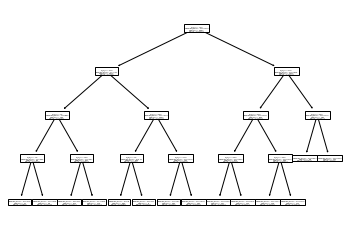

In [ ]:
from sklearn import tree

tree.plot_tree(reg_tree)